<a href="https://colab.research.google.com/github/vitormiro/estatistica_ppger_ufc/blob/main/Distribuicoes_amostrais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuições amostrais

**Definição**. 

Uma amostra aleatória de tamanho $n$ de uma variável aleatória $X$ com função distribuição $F$ , é um vetor $X = (X_1,X_2, \cdots ,X_n )$ em que as componentes $X_i$ são independentes e possuem distribuição $F$.

Dada uma amostra aleatória $X = (X_1,X_2, \cdots, X_n)$ de uma variável $X$ com média $\mu$ e variancia $\sigma^2$ então $\mathbb{E}(X_i) = \mu$ e $Var(X_i) = \sigma^2$ para todo $i = {1, 2, \cdots, n}$.

A distribuição de probabilidade de um estimador é chamada de **distribuição amostral**.

A distribuição amostral de um estimador depende da distribuição de probabilidade da população da qual a amostra foi selecionada, do tamanho da amostra e do método de seleção da amostra.

### Distribuição Amostral da média

**Teorema**

Seja uma variável $X$ com média $\mu$ e variancia $\sigma^2$, e uma amostra $(x_1,x_2, \cdots, x_n)$, obtida em um processo de amostragem aleatória simples, então:

$$ E(\bar{X}) = \mu  $$

$$ Var(\bar{X}) = \frac{\sigma^2}{n} $$


**EXEMPLO**

Vamos usar o *Numpy* e o módulo [`random`](https://numpy.org/doc/stable/reference/random/index.html) do Numpy para simular distribuições populacionais.



In [8]:
# Importar o Numpy e o Matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



No exemplo a seguir usaremos a função [`gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html) para simular uma variável aleatória com distribuição Gama: $X \sim Gama(\alpha,\beta)$; com $ \alpha > 0 $ e $ \beta > 0 $.

- Função de probabilidade
$$ f(X) = \frac{X^{\alpha-1} e^{\frac{-X}{\beta}}}{\beta^{\alpha} \Gamma(\alpha)}; \hspace {5pt} x > 0 $$

Em que $\alpha$ é um parâmetro de forma (*shape*) e $\beta$ é um parâmetro de escala (*scale*).

- Valor esperado:
$$ E(X) = \alpha \beta $$

- Variância
$$ Var(X) = \alpha \beta^2 $$


Com $\alpha =1$ temos uma distribuição exponencial: $X \sim Exp(\lambda)$ e $\lambda= \frac{1}{\beta}$.

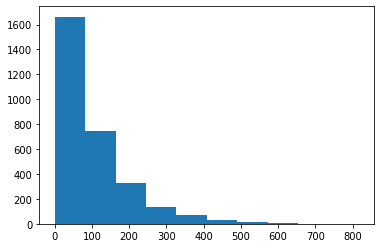

In [2]:
# Semente aleatória
np.random.seed(42)

# simular dados populacionais com uma distribuição Gama (média = 100 e variância = 10.000)
pop_data = np.random.gamma(1, 100, 3000)
plt.hist(pop_data);

**Média populacional**

In [9]:
# Média calculadas com base na população simulada.
pop_data.mean()

100.35978700795846

**Variância e desvio padrão amostral**

In [10]:
# Variância e desvio-padrão calculados com base na população simulada.
print("Variância = ", pop_data.var())
print("Desvio-padrão = ", pop_data.std())

Variância =  9955.76939306549
Desvio-padrão =  99.77860187968906


Vamos selecionar uma amostra aleatória de 10 unidades dessa população usando [`random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) do Numpy. 

Qual é a média da amostra para esses 10 valores?

In [12]:
# Obtendo uma amostra de 10 observações da população simulada.
sample = np.random.choice(pop_data, 10)
# Mostrar dados da amostra
print(sample)

[ 56.55370668 184.40771413 193.58337438  51.77500786   4.79849924
  81.73604076  60.92408858  17.52584347 141.98034755  77.95934969]


In [13]:
# Média amostral 
print("Média amostral = ", sample.mean())

Média amostral =  87.12439723384534


Qual é a variância e desvio-padrão da amostra?

In [14]:
# Variância amostral
print("Variância = ", sample.var())
# Desvio-padrão amostral
print("Desvio-padrão = ", sample.std())

Variância =  3841.188011967525
Desvio-padrão =  61.97731852837395


**Considerando diversas amostras**

Vamos criar um processo de extração de diversas amostras da nossa população e analisar a distribuição amostral do estimador da média.

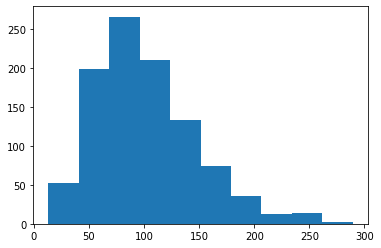

In [49]:
# criar vetor para receber médias amostrais
means_n5 = []

np.random.seed(42)
# Simular 1.000 amostras e salvar as médias em means_n5
for _ in range(1000):
    sample5 = np.random.choice(pop_data, 5)
    means_n5.append(sample5.mean())

# Plotar um histograma simples
plt.hist(means_n5);

Lembre-se:

$$ E(\bar{X}) = \mu  $$

$$ Var(\bar{X}) = \frac{\sigma^2}{n} $$

In [50]:
# Média
xbar = np.mean(means_n5)
print(xbar)

101.69148998893094


In [51]:
# Variância
s2 = np.var(means_n5)
print(s2)

# Desvio-padrão
s = np.std(means_n5)
print(s)

2117.32532728214
46.014403476326194


# O Teorema do Limite Central

Um resultado importante muito utilizado em inferência é o Teorema Central do Limite, que fornece uma inportante conclusão a respeito da distribuição da soma de variáveis aleatórias independentes.

**Teorema**. Seja ${X_n ,n \geq 1}$ uma seqüência de variáveis aleatórias independentes e identicamnte distribuídas, com média $\mu$ e variância $\sigma^2 < \infty$. Então, para $S_n = \sum_{i=1}^{n} X_n$, tem-se:

$$ \frac{S_n - \mathbb{E}(X_i)}{\sqrt{Var(S_n}} = \frac{S_n - n \mu}{\sigma \sqrt{n}} \xrightarrow{d}  N(0,1) $$

In [52]:
sample1 = np.random.choice(pop_data, 100)
x1 = np.mean(sample1)
print(x1)

103.67903048512215


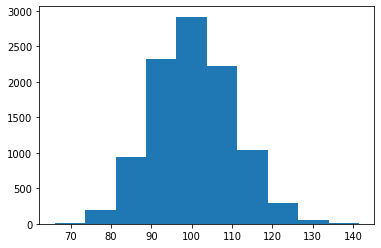

In [53]:
# criar vetor para receber médias amostrais
means_size_100 = []

# Simular 10.000 amostras e salvar as médias em means_size_100
for _ in range(10000):
    sample = np.random.choice(pop_data, 100)
    means_size_100.append(sample.mean())

plt.hist(means_size_100);

**Parâmetros populacionais**

In [54]:
mu = np.mean(pop_data)
print("Média =", mu)
var_pop = np.var(pop_data)
print("Variância =", var_pop)

Média = 100.35978700795846
Variância = 9955.76939306549


**Estimativas amostrais**

In [55]:
xbar = np.mean(means_size_100);
print("Média amostral =", xbar)
var_sample = np.var(means_size_100)
print("Variância amostral =", var_sample)

Média amostral = 100.44915227066977
Variância amostral = 97.40645286306574


*Observação*: A qualidade da aproximação normal para a distribuição amostral da média dependerá do tamanho da amostra e da distribuição da população de onde foi retirada a amostra. Em muito casos de interesse prático, se $n \geq 30$ a aproximação normal será satisfatória, independente da distribuição da população.

### Distribuição amostral da variância

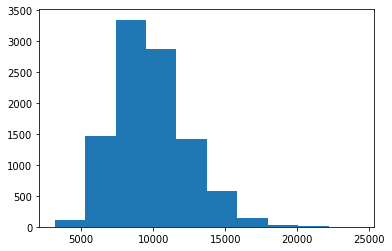

In [56]:
# Criar um vetor para receber variâncias amostrais
var_size_100 = []

# Simulando 10.000 valores de variância amostral
for _ in range(10000):
    sample = np.random.choice(pop_data, 100)
    var_size_100.append(sample.var())

plt.hist(var_size_100);

**Média e variância da estimativa de variância amostral**

In [57]:
mean_s2 = np.mean(var_size_100);
print("Valor esperado =", mean_s2)

var_s2 = np.var(var_size_100)
print("Variância =", var_s2)

Valor esperado = 9835.727207394975
Variância = 6403358.798455699


# Lei dos Grandes Números

A **Lei dos Grandes Números** é um dos teoremas mais importantes da probabilidade.

De forma simplificada, ela diz que quanto maior o número de amostras, mais a média amostral tenderá ao valor esperado ($\mu$).

Considerando uma variável aleatória $X$ e seja $X_1,X_2, \cdots,X_n$ uma amostra aleatória de $X$ com $n$ "grande".

$$ \bar{X_n} = \frac{1}{n} \sum_{i=1}^{n} X_i \rightarrow \mu \quad \text{quando} \quad n \rightarrow \infty  $$

### Lei Fraca Dos Grandes Números

Seja $X_1, X_2 , \cdots, X_n$ uma AAS de variáveis aleatórias *i.i.d.* com média $\mu$ e variância $\sigma^2 < \infty$. Então, para qualquer $\epsilon > 0$,

\begin{align}
  \lim_{n \rightarrow \infty} P(|\overline{X}-\mu| \geq \epsilon)=0.
\end{align}

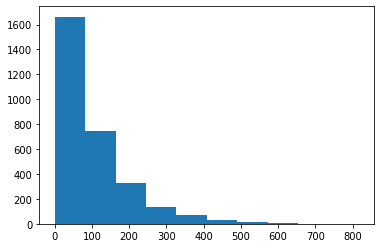

In [58]:
# Semente aleatória
np.random.seed(42)

# simular dados populacionais com uma distribuição Gama
pop_data = np.random.gamma(1,100, 3000)
plt.hist(pop_data);

In [59]:
# Tamanho da população
N = len(pop_data)
print(N)

3000


In [60]:
# Média populacional
mu = np.mean(pop_data)
print(mu)

100.35978700795846


Vamos considerar uma amostra inicial de $n=5$:

In [61]:
# Uma amostra de 5 observações
sample5 = np.random.choice(pop_data, 5)
print("Amostra (n=5) =", sample5)

# Média amostral  (n=5)
x5 = np.mean(sample5)
print("Média amostral (n=5) =", x5)

Amostra (n=5) = [  1.99073813   2.56776095 100.03907725  26.44660917   7.38496269]
Média amostral (n=5) = 27.685829640608965


Vejamos o valor de $|\overline{X}-\mu|$:

In [62]:
print("Diferença =", abs(x5 - mu))

Diferença = 72.67395736734949


Vamos aumentar o tamanho da amostra para $n=20$

In [63]:
# Uma amostra de 20 observações
sample20 = np.random.choice(pop_data, 20)
print("Amostra (n=20) =", sample20)

# Média amostral (n=20)
x20 = np.mean(sample20)
print("Média amostral (n=20) =", x20)

Amostra (n=20) = [150.12425405 227.09741251   3.16290491 428.38655756  87.55537772
 265.49500859 119.16779497  59.13481289 158.08374881 356.77981383
 431.47510845 270.19418338  47.23477616  44.66526676  15.95263842
 106.31988723 386.82424166  27.20486222  62.10553019  20.43885995]
Média amostral (n=20) = 163.3701520126447


In [64]:
print("Diferença =", abs(x20 - mu))

Diferença = 63.010365004686236


In [65]:
# Uma amostra de 100 observações
sample100 = np.random.choice(pop_data, 100)
print("Amostra (n=100) =", sample100)

# Média amostral (n=100)
x100 = np.mean(sample100)
print("Média amostral (n=100) =", x100)

Amostra (n=100) = [ 56.55370668 184.40771413 193.58337438  51.77500786   4.79849924
  81.73604076  60.92408858  17.52584347 141.98034755  77.95934969
 124.54172889 100.28059836 223.04811056 197.13449719  27.53487243
 155.39900137 339.37467824 343.76550028  87.27494299  89.43587636
   0.78724977  49.13006922 234.5061523  275.83812054  99.77924597
   8.27506873  50.85998157   8.78917262   5.33549735 130.62768386
 166.3647723  439.40638915   3.04319809  62.10553019 169.8663034
  57.42105041  46.72104006   5.92817064  40.72336041 151.75954932
 324.7673666  128.10430976 172.3933906    4.28565873 108.91623873
 114.29336926  59.27636022  18.26653224 329.17249724  15.02345287
  67.22721095 183.13465118 104.87738143  20.64917455  27.90293443
  70.57584889  29.92430907  99.30575735  90.98443102  59.24977234
  70.37074898  64.23811416  70.41173695 121.96983475  44.40684119
 120.7879966  212.75463181 146.66583262 125.20674729   0.55374204
  99.26282904  96.83989671  26.4242531  377.98631126  11.41

In [66]:
print("Diferença =", abs(x100 - mu))

Diferença = 19.190982833200152


In [67]:
# Uma amostra de 1000 observações
samplemil = np.random.choice(pop_data, 1000)

# Média amostral (n=1000)
xmil = np.mean(samplemil)
print("Média amostral (n=1000) =", xmil)

Média amostral (n=1000) = 104.53165484193792


In [68]:
print("Diferença =", abs(xmil - mu))

Diferença = 4.171867833979462
